In [34]:
import pandas as pd
df = pd.read_excel('C:/Users/Hoi Yee/Downloads/Online Retail.xlsx')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


## 1. Data Cleaning

In [35]:
# Load the dataset and check for missing values in critical columns (e.g.,CustomerID, Quantity, UnitPrice).
any_missing = df.isnull().any()
print(any_missing)

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool


In [36]:
# Remove transactions with negative or zero values for Quantity or UnitPrice, as these represent refunds or errors

df_filtered = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [37]:
# For rows missing CustomerID, label these transactions as "guest" but exclude them from customer-level analyses.

df= df_filtered
df.loc[df['CustomerID'].isna(), 'CustomerID'] = 'guest'

C:\Users\Hoi Yee\AppData\Local\Temp\ipykernel_6452\3661889318.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'guest' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['CustomerID'].isna(), 'CustomerID'] = 'guest'


In [38]:
df = df[df['CustomerID'] != 'guest']

In [39]:
# Save the cleaned dataset as advanced_cleaned_retail.csv.

df.to_csv('advanced_cleaned_retail.csv', index=False)

## 2. Feature Engineering

In [40]:
# Calculate TotalPrice: Create a column that multiplies Quantity by UnitPrice.

df =pd.read_csv('C:/Users/Hoi Yee/Downloads/advanced_cleaned_retail.csv')
print(df.head())

   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

       InvoiceDate  UnitPrice  CustomerID         Country  
0  01/12/2010 8:26       2.55       17850  United Kingdom  
1  01/12/2010 8:26       3.39       17850  United Kingdom  
2  01/12/2010 8:26       2.75       17850  United Kingdom  
3  01/12/2010 8:26       3.39       17850  United Kingdom  
4  01/12/2010 8:26       3.39       17850  United Kingdom  


In [41]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850,United Kingdom


In [42]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850,United Kingdom,20.34


In [43]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M')

# Keep only the date part
df['InvoiceDate'] = df['InvoiceDate'].dt.date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34


In [46]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Define a reference date 
reference_date = pd.to_datetime('2010-12-01')

# Calculate Recency (days since last purchase)

recency_df = df.groupby('CustomerID').agg(LastPurchaseDate=('InvoiceDate', 'max')).reset_index()
recency_df['Recency'] = (reference_date - recency_df['LastPurchaseDate']).dt.days

print(recency_df)

      CustomerID LastPurchaseDate  Recency
0          12346       2011-01-18      -48
1          12347       2011-12-07     -371
2          12348       2011-09-25     -298
3          12349       2011-11-21     -355
4          12350       2011-02-02      -63
...          ...              ...      ...
4333       18280       2011-03-07      -96
4334       18281       2011-06-12     -193
4335       18282       2011-12-02     -366
4336       18283       2011-12-06     -370
4337       18287       2011-10-28     -331

[4338 rows x 3 columns]


In [47]:
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346,2011-01-18,-48
1,12347,2011-12-07,-371
2,12348,2011-09-25,-298
3,12349,2011-11-21,-355
4,12350,2011-02-02,-63


In [48]:
# Frequency: Total number of purchases by each customer.

frequency_df = df.groupby('CustomerID').size().reset_index(name='Frequency')
frequency_df.head()

,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [49]:
# Monetary: Total spending (TotalPrice) by each customer.
monetary_df = df.groupby('CustomerID').agg(Monetary=('TotalPrice', 'sum')).reset_index()

monetary_df.head()

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [50]:
# Add time-based features: Extract Year, Month, and Day of Week from InvoiceDate.

# Extract Year, Month, and Day of Week
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,2010,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,2010,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010,12,Wednesday


In [51]:
# Create a HolidayPeriod binary feature to indicate transactions during holiday seasons (e.g., December).

# Create HolidayPeriod binary feature (e.g., December)
df['HolidayPeriod'] = df['Month']== 12  # 1 if December, 0 otherwise
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,DayOfWeek,HolidayPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,2010,12,Wednesday,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,2010,12,Wednesday,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,True


In [52]:
# Save the feature-engineered dataset as customer_features.csv.

df.to_csv('customer_features.csv', index=False)

## 3. Exploratory Data Analysis (EDA)

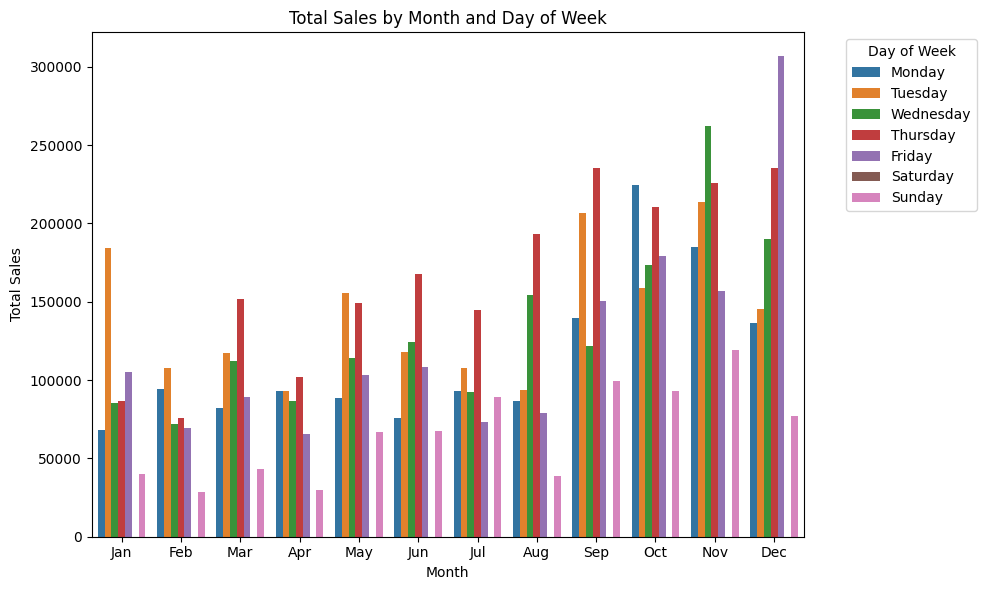

In [54]:
# Sales Trends: Plot total sales (TotalPrice) aggregated by Month and Day of Week to identify patterns or peaks.

import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate Total Sales by Month and Day of Week
monthly_sales = df.groupby(['Month', 'DayOfWeek'])['TotalPrice'].sum().reset_index()

# Reorder DayOfWeek to match the correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
monthly_sales['DayOfWeek'] = pd.Categorical(monthly_sales['DayOfWeek'], categories=day_order, ordered=True)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='Month', y='TotalPrice', hue='DayOfWeek', dodge=True)

plt.title('Total Sales by Month and Day of Week')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

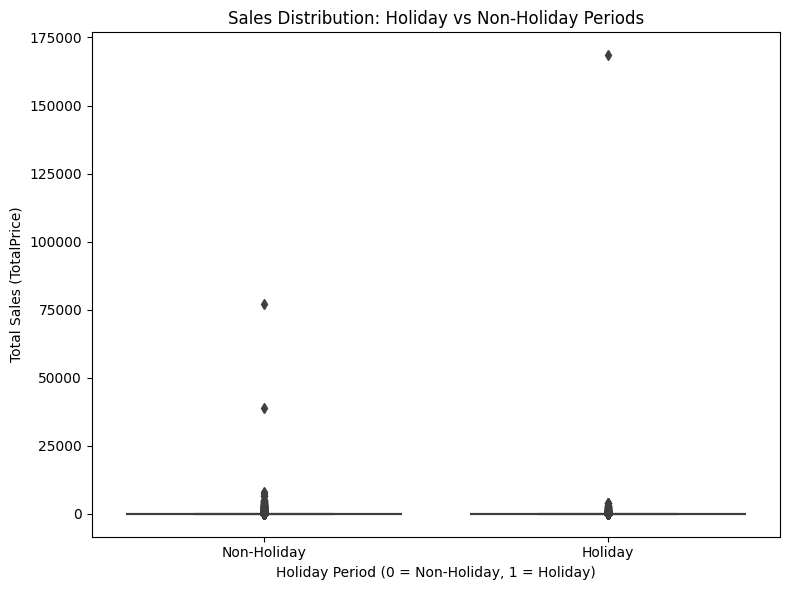

In [55]:
# Visualize sales distribution during holiday vs. non-holiday periods.

# Plot the sales distribution during holiday vs non-holiday periods
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='HolidayPeriod', y='TotalPrice')

# Adjust the plot
plt.title('Sales Distribution: Holiday vs Non-Holiday Periods')
plt.xlabel('Holiday Period (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('Total Sales (TotalPrice)')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])

plt.tight_layout()
plt.show()

In [56]:
# Customer Analysis: Create histograms for Recency, Frequency, and Monetary values.

# Merge Recency, Frequency, and Monetary
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

# Plot histograms for Recency, Frequency, and Monetary
plt.figure(figsize=(18, 6))


<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

C:\Users\Hoi Yee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

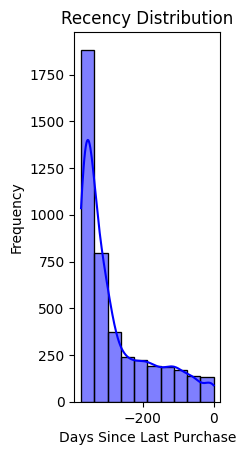

In [57]:
# Recency Histogram
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], kde=True, color='blue', bins=10)
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')

C:\Users\Hoi Yee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

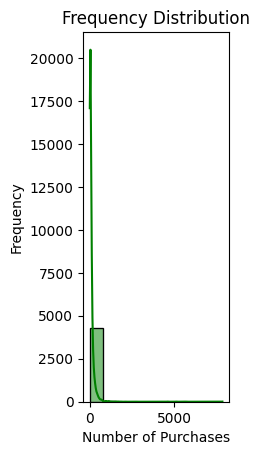

In [58]:
# Frequency Histogram
plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], kde=True, color='green', bins=10)
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')

C:\Users\Hoi Yee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

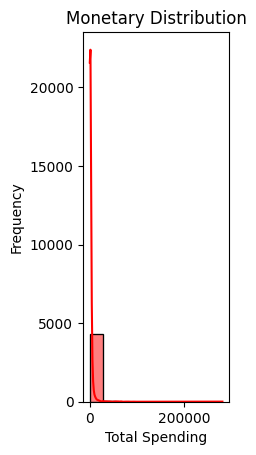

In [62]:
# Monetary Histogram
plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], kde=True, color='red', bins=10)
plt.title('Monetary Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')



C:\Users\Hoi Yee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


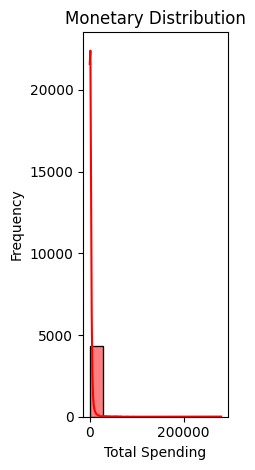

In [63]:
# Monetary Histogram
plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], kde=True, color='red', bins=10)
plt.title('Monetary Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [64]:
# Identify high-value customers using RFM distribution.

import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize RFM features using Min-Max Scaling
scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])
rfm_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']] = rfm_scaled

# Calculate the RFM score (higher is better for Frequency and Monetary, lower is better for Recency)
rfm_df['RFM_Score'] = rfm_df['Recency_scaled'] + rfm_df['Frequency_scaled'] + rfm_df['Monetary_scaled']

# Assign customer categories based on RFM score
rfm_df['CustomerCategory'] = pd.qcut(rfm_df['RFM_Score'], 3, labels=['Low', 'Medium', 'High'])

# Identify high-value customers
high_value_customers = rfm_df[rfm_df['CustomerCategory'] == 'High']

print(rfm_df)
print("\nHigh-Value Customers:")
print(high_value_customers[['CustomerID', 'RFM_Score', 'CustomerCategory']])

      CustomerID LastPurchaseDate  Recency  Frequency  Monetary  \
0          12346       2011-01-18      -48          1  77183.60   
1          12347       2011-12-07     -371        182   4310.00   
2          12348       2011-09-25     -298         31   1797.24   
3          12349       2011-11-21     -355         73   1757.55   
4          12350       2011-02-02      -63         17    334.40   
...          ...              ...      ...        ...       ...   
4333       18280       2011-03-07      -96         10    180.60   
4334       18281       2011-06-12     -193          7     80.82   
4335       18282       2011-12-02     -366         12    178.05   
4336       18283       2011-12-06     -370        756   2094.88   
4337       18287       2011-10-28     -331         70   1837.28   

      Recency_scaled  Frequency_scaled  Monetary_scaled  RFM_Score  \
0           0.871314          0.000000         0.275443   1.146757   
1           0.005362          0.023069         0.015368

In [65]:
rfm_df.head()

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,Recency_scaled,Frequency_scaled,Monetary_scaled,RFM_Score,CustomerCategory
0,12346,2011-01-18,-48,1,77183.60,0.871314,0.000000,0.275443,1.146757,High
1,12347,2011-12-07,-371,182,4310.00,0.005362,0.023069,0.015368,0.043799,Low
2,12348,2011-09-25,-298,31,1797.24,0.201072,0.003824,0.006401,0.211297,Medium
3,12349,2011-11-21,-355,73,1757.55,0.048257,0.009177,0.006259,0.063693,Low
4,12350,2011-02-02,-63,17,334.40,0.831099,0.002039,0.001180,0.834318,High


In [66]:
high_value_customers.head()

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,Recency_scaled,Frequency_scaled,Monetary_scaled,RFM_Score,CustomerCategory
0,12346,2011-01-18,-48,1,77183.6,0.871314,0.000000,0.275443,1.146757,High
4,12350,2011-02-02,-63,17,334.4,0.831099,0.002039,0.001180,0.834318,High
6,12353,2011-05-19,-169,4,89.0,0.546917,0.000382,0.000304,0.547603,High
7,12354,2011-04-21,-141,58,1079.4,0.621984,0.007265,0.003839,0.633088,High
8,12355,2011-05-09,-159,13,459.4,0.573727,0.001529,0.001626,0.576882,High


In [68]:
high_value_customers[['CustomerID', 'RFM_Score', 'CustomerCategory']].head()

,CustomerID,RFM_Score,CustomerCategory
0,12346,1.146757,High
4,12350,0.834318,High
6,12353,0.547603,High
7,12354,0.633088,High
8,12355,0.576882,High


In [70]:
# Clustering Preparation: Normalize the RFM data to ensure fair contribution of each feature.

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize RFM features
rfm_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']] = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# For Recency, we need to reverse the scale (since lower recency is better)
rfm_df['Recency_scaled'] = 1 - rfm_df['Recency_scaled']  # Invert Recency scale: lower recency (recent purchases) = higher score

# Calculate RFM Score: Combine normalized values
rfm_df['RFM_Score'] = rfm_df['Recency_scaled'] + rfm_df['Frequency_scaled'] + rfm_df['Monetary_scaled']

# Assign customer categories based on RFM score
rfm_df['CustomerCategory'] = pd.qcut(rfm_df['RFM_Score'], 3, labels=['Low', 'Medium', 'High'])

# View the results
rfm_df.head()

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,Recency_scaled,Frequency_scaled,Monetary_scaled,RFM_Score,CustomerCategory
0,12346,2011-01-18,-48,1,77183.60,0.128686,0.000000,0.275443,0.404130,Low
1,12347,2011-12-07,-371,182,4310.00,0.994638,0.023069,0.015368,1.033076,High
2,12348,2011-09-25,-298,31,1797.24,0.798928,0.003824,0.006401,0.809152,Medium
3,12349,2011-11-21,-355,73,1757.55,0.951743,0.009177,0.006259,0.967178,High
4,12350,2011-02-02,-63,17,334.40,0.168901,0.002039,0.001180,0.172120,Low


## 4. Clustering for Segmentation

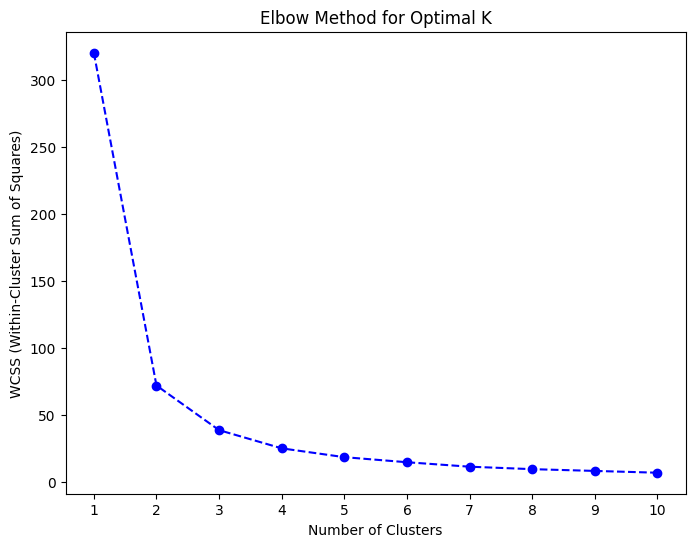

In [71]:
# Apply K-Means Clustering:
# ○ Perform the Elbow Method to find the optimal number of clusters for customer segmentation.

from sklearn.cluster import KMeans

# Normalize RFM features
scaler = MinMaxScaler()
rfm_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']] = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Elbow Method: Calculate WCSS for different numbers of clusters (Within-Cluster Sum of Squares)
wcss = []
for k in range(1, 11):  # Try 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.show()

In [72]:
# Fit a K-Means model on the RFM data and label each customer with a cluster ID.

# Normalize the RFM features
scaler = MinMaxScaler()
rfm_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']] = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Reverse the scale for Recency (lower recency is better)
rfm_df['Recency_scaled'] = 1 - rfm_df['Recency_scaled']  # Invert Recency scale

# Fit K-Means clustering with 3 clusters (adjust the number based on your Elbow method result)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
rfm_df['Cluster_ID'] = kmeans.fit_predict(rfm_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']])

# View the results with the cluster labels
rfm_df[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster_ID']].head()


,CustomerID,Recency,Frequency,Monetary,Cluster_ID
0,12346,-48,1,77183.60,2
1,12347,-371,182,4310.00,0
2,12348,-298,31,1797.24,0
3,12349,-355,73,1757.55,0
4,12350,-63,17,334.40,2


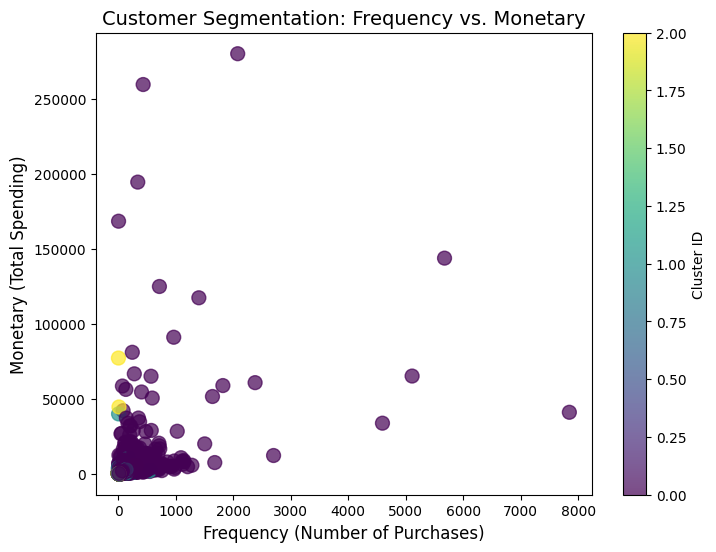

In [73]:

# Interpret Results: Visualize clusters using scatter plots (e.g., Frequency vs. Monetary) to interpret segments.

# Scatter plot of Frequency vs. Monetary, colored by Cluster_ID
plt.figure(figsize=(8, 6))
plt.scatter(rfm_df['Frequency'], rfm_df['Monetary'], c=rfm_df['Cluster_ID'], cmap='viridis', s=100, alpha=0.7)

# Add labels and title
plt.title('Customer Segmentation: Frequency vs. Monetary', fontsize=14)
plt.xlabel('Frequency (Number of Purchases)', fontsize=12)
plt.ylabel('Monetary (Total Spending)', fontsize=12)

# Add a color bar to show cluster IDs
plt.colorbar(label='Cluster ID')

# Show the plot
plt.show()

### Describe the key characteristics of each cluster (e.g., high-value customers, inactive customers).

1. High-Value Customers: Customers who make frequent purchases and spend a lot.
2. Inactive Customers: Customers who make few purchases and spend less.
3. Engaged but Low-Spending Customers: Customers who make frequent purchases but spend less.

Analyze the characteristics of each cluster based on the RFM features:
- Recency: Lower values of Recency indicate recent purchases (better engagement).
- Frequency: Higher values of Frequency indicate more frequent purchases.
- Monetary: Higher values of Monetary indicate higher spending.

Calculate the mean of Recency, Frequency, and Monetary for each cluster.

In [74]:
# Group by Cluster_ID and calculate the mean values of RFM features

cluster_summary = rfm_df.groupby('Cluster_ID').agg(
    Recency_mean=('Recency', 'mean'),
    Frequency_mean=('Frequency', 'mean'),
    Monetary_mean=('Monetary', 'mean')
).reset_index()

cluster_summary

,Cluster_ID,Recency_mean,Frequency_mean,Monetary_mean
0,0,-341.476536,120.731884,2720.011554
1,1,-220.678133,40.754300,796.941095
2,2,-79.055911,23.688498,607.195479


### Cluster 0:

- Recency - low value is better.
- Recency: -341.476536 , Active Customers who make frequent purchases- highly engaged, High-Value Customers
- Frequency: 120.731884 (high frequency of purchases). high frequency, highly engaged or loyal customers.
- Monetary: 2720.011554 (high-value customer segment). These are high-spending customers.

Cluster Characteristics: These customers are likely active or High-Value customers. They have made recent purchases and have high frequency and spending.

### Cluster 1:

- Recency - low value is better.
- Recency: -220.678133 , Moderate-Active Customers who make Moderate-frequent purchases- Moderate-value Customers
- Frequency: 40.754300 (Moderate frequency of purchases). Moderate engaged customers.
- Monetary: 796.941095 (Moderate-value customer segment). These are Moderate-spending customers.

Cluster Characteristics: These customers are Moderate-Value customers.

### Cluster 2:

- Recency - low value is better.
- Recency: -79.055911, Inactive Customers who make less purchases
- Frequency: 120.731884 (low frequency of purchases). Inactive customers.
- Monetary: 2720.011554 (low-value customer segment). These are Inactive customers.

Cluster Characteristics: These customers are likely inactive or low-Value customers. They haven’t made recent purchases and have low frequency and spending.

In [75]:
# Save the segmented dataset as customer_segments.csv.

df.to_csv('customer_segments.csv', index=False)

## 5. Predictive Modeling

### Build a Regression Model for CLV: 

Define CLV (Customer Lifetime Value ) as the total spending (Monetary) of a customer. CLV = Total Spend = Monetary
- Time is not considered: This definition doesn't account for how long a customer is active or how likely they are to continue spending in the future.
- Retention/Churn: It does not take into account customer retention rates or potential future transactions.

### Split the data into training and testing sets, and fit a regression model (e.g., Linear Regression or Random Forest) to predict CLV based on features such as Recency, Frequency, and HolidayPeriod.

### Data Preparation:
- features: Recency, Frequency, and HolidayPeriod.
- target: CLV

### Splitting the Data:
- training (80%)
- testing (20%) 

### Model Selection:
- Linear Regression (simple approach)
- Random Forest (non-linear model)

### Training the Model:
- on the training set

### Model Evaluation:
- Mean Absolute Error (MAE), Mean Squared Error (MSE), or R² score.

In [76]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,DayOfWeek,HolidayPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,2010,12,Wednesday,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,2010,12,Wednesday,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,True


In [78]:
cluster_summary

,Cluster_ID,Recency_mean,Frequency_mean,Monetary_mean
0,0,-341.476536,120.731884,2720.011554
1,1,-220.678133,40.754300,796.941095
2,2,-79.055911,23.688498,607.195479


In [80]:
df['HolidayPeriod'] = df['HolidayPeriod'].astype(int)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,DayOfWeek,HolidayPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,2010,12,Wednesday,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,2010,12,Wednesday,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,1


In [81]:
rfm_df.head()


,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,Recency_scaled,Frequency_scaled,Monetary_scaled,RFM_Score,CustomerCategory,Cluster_ID
0,12346,2011-01-18,-48,1,77183.60,0.128686,0.000000,0.275443,0.404130,Low,2
1,12347,2011-12-07,-371,182,4310.00,0.994638,0.023069,0.015368,1.033076,High,0
2,12348,2011-09-25,-298,31,1797.24,0.798928,0.003824,0.006401,0.809152,Medium,0
3,12349,2011-11-21,-355,73,1757.55,0.951743,0.009177,0.006259,0.967178,High,0
4,12350,2011-02-02,-63,17,334.40,0.168901,0.002039,0.001180,0.172120,Low,2


In [85]:
rfm_1 = rfm_df[['Recency', 'Frequency', 'Monetary']] 
rfm_1.head()

,Recency,Frequency,Monetary
0,-48,1,77183.60
1,-371,182,4310.00
2,-298,31,1797.24
3,-355,73,1757.55
4,-63,17,334.40


In [86]:
rfm_1['HolidayPeriod']=df['HolidayPeriod']
rfm_1.head()

C:\Users\Hoi Yee\AppData\Local\Temp\ipykernel_6452\2427797059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_1['HolidayPeriod']=df['HolidayPeriod']


,Recency,Frequency,Monetary,HolidayPeriod
0,-48,1,77183.60,1
1,-371,182,4310.00,1
2,-298,31,1797.24,1
3,-355,73,1757.55,1
4,-63,17,334.40,1


In [89]:
# Define features (X) and target (y)
X = rfm_1[['Recency', 'Frequency', 'HolidayPeriod']]  # Features
y = rfm_1['Monetary']  # Target variable (CLV)

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Choose a model: Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [94]:
print("Mean Squared Error (MSE):", mse) # the lower the value the better
print("R^2 Score:", r2) # high value means model a good fit

Mean Squared Error (MSE): 106406679.95351039
R^2 Score: -0.03869326902405157


In [95]:
# Choose a model: Random Forest

from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse) # the lower the value the better
print("R^2 Score:", r2)

Mean Squared Error (MSE): 156020629.89748502
R^2 Score: -0.5230019221933635


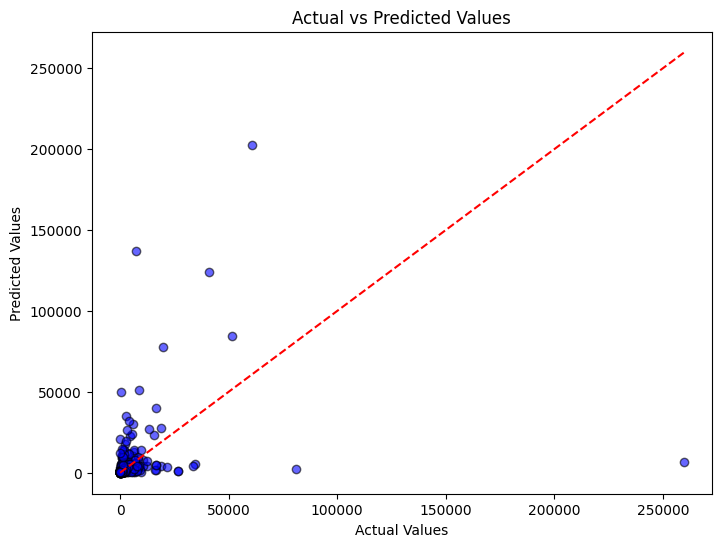

In [97]:
# Visualize actual vs. predicted values for CLV. Scatter Plot

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors="k")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


C:\Users\Hoi Yee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hoi Yee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hoi Yee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hoi Yee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

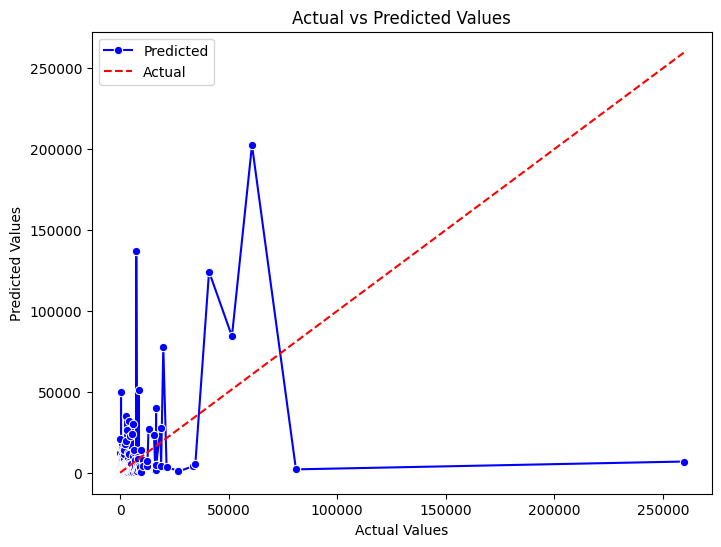

In [98]:
# Seaborn line plot for actual vs predicted values
plt.figure(figsize=(8, 6))
sns.lineplot(x=y_test, y=y_pred, color='blue', marker='o', label='Predicted')
sns.lineplot(x=y_test, y=y_test, color='red', label='Actual', linestyle='--')
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


### 6. Insights and Recommendations
● Write a 2-3 paragraph report summarizing:

- Key insights from clustering (e.g., customer segments and their characteristics).
- Performance of the predictive model and how accurately it identifies high-value customers.
- Recommendations for marketing strategies tailored to different customer segments, such as loyalty programs for high-value customers or re-engagement campaigns for inactive ones.


#### Key insights from clustering (e.g., customer segments and their characteristics).

Cluster 0 : High-value customers: Focus on retention and loyalty.
 
Cluster 1 : Moderate-value customers: Use upsell or cross-sell opportunities. 

Cluster 2 : Inactive customers: Use re-engagement tactics (discounts, special offers).

#### Performance of the predictive model and how accurately it identifies high-value customers - 

I know my models are wrong.

#### Recommendations for marketing strategies tailored to different customer segments, such as loyalty programs for high-value customers or re-engagement campaigns for inactive ones.


High-value customers: VIP programs with exclusive benefits, such as early access to new products, special discounts, or personalized services. Consider tiered programs that reward continued engagement.

Moderate-Value Customers: engaged and loyal but not big spenders 

Targeted Promotions & Offers: "buy more, save more" strategy to increase average order value. 

Email Campaigns: email marketing campaigns to share personalized content and offers based on past behavior.

Build Community: Encourage them to join your brand's community, through social media, online groups, or forums. 
influenced them by social proof and community involvement.

Low-Value Customers : more price-sensitive, can be nurtured for growth. 

Bundling: Create product bundles that offer more value at a lower price

Cross-Selling and Upselling: Offer low-cost add-ons or upgrades to encourage larger purchases.

Frequent Reminders: Use email and SMS campaigns to keep them engaged (sales, new arrivals, or special discounts)